In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,roc_curve,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_curve,auc,RocCurveDisplay,plot_roc_curve,roc_auc_score
%matplotlib inline

In [2]:
data = sm.datasets.fair.load_pandas().data

In [3]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
#Description about data
print(sm.datasets.fair.DESCRLONG)

#WIth points
print()
print(sm.datasets.fair.NOTE)

Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation    

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
#As we can se: affairs are in time context so if 
# affair is greater than 0 ==> Affair is going on
#hence converting affair to binary colum i.e 0 and 1

data.loc[data['affairs']>0]
data['bin_affairs']=(data['affairs']>0).astype(int)


In [7]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,bin_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
#Using Design matrix to genrate the relationship between y and all the features
# 'C': does the ONE HOT ENCODING for us

y, X = dmatrices('bin_affairs ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)'
                 ,data, return_type='dataframe')

In [9]:
y

,bin_affairs
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [10]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [11]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [12]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
#Removing the intercept from the X
X.drop(X.columns[0],axis=1,inplace=True)

In [14]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [15]:
# Will turn the array into 1-D array of default data type
y_=np.ravel(y)
print(f"Initial y in array format is: {y_[:5]}")

print(f"Shape of y_ is:{y.shape}")

Initial y in array format is: [1. 1. 1. 1. 1.]
Shape of y_ is:(6366, 1)


In [16]:
y.head()

,bin_affairs
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### Let's dig more graphically

In [17]:
#creating the new data frame for exploratory purpose
df=X.copy()
df['affairs']=y


In [18]:
df.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [19]:
#Basic description about df 
# mean, standard deviation, minimum value, and thier IQR's
df.describe()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,0.322495
std,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.467468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


affairs
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

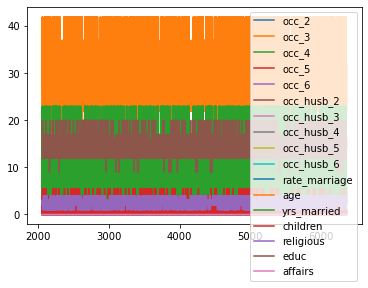

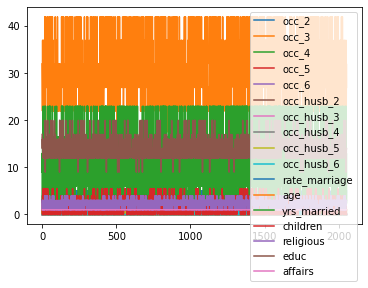

In [20]:
df.groupby('affairs').plot()

In [21]:
print(f"the mean is : {df.groupby('affairs').mean()}")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print(f"the median is : {df.groupby('affairs').median()}")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print(f"the standard deviation is : {df.groupby('affairs').std()}")

the mean is :             occ_2     occ_3     occ_4     occ_5     occ_6  occ_husb_2  \
affairs                                                                 
0.0      0.140737  0.421516  0.313935  0.099930  0.015998    0.204498   
1.0      0.122747  0.470044  0.233804  0.150511  0.019484    0.207501   

         occ_husb_3  occ_husb_4  occ_husb_5  occ_husb_6  rate_marriage  \
affairs                                                                  
0.0        0.073499    0.322513    0.272896    0.084628       4.329701   
1.0        0.084267    0.311252    0.293229    0.080370       3.647345   

               age  yrs_married  children  religious       educ  
affairs                                                          
0.0      28.390679     7.989335  1.238813   2.504521  14.322977  
1.0      30.537019    11.152460  1.728933   2.261568  13.972236  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

the median is :          occ_2  occ_3  occ_4  occ_5  occ_6  occ_

In [22]:
df.groupby('affairs').mean()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
affairs,,,,,,,,,,,,,,,,
0.0,0.140737,0.421516,0.313935,0.099930,0.015998,0.204498,0.073499,0.322513,0.272896,0.084628,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977
1.0,0.122747,0.470044,0.233804,0.150511,0.019484,0.207501,0.084267,0.311252,0.293229,0.080370,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236


######  We can see that on average, women who have affairs rate ==1  their marriages lower, which is to be expected. Let's take another look at the rate_marriage variable.

In [23]:
df.groupby('rate_marriage').mean()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children,religious,educ,affairs
rate_marriage,,,,,,,,,,,,,,,,
1.0,0.242424,0.393939,0.262626,0.090909,0.010101,0.212121,0.070707,0.313131,0.323232,0.050505,33.823232,13.914141,2.308081,2.343434,13.848485,0.747475
2.0,0.143678,0.520115,0.206897,0.109195,0.017241,0.252874,0.094828,0.298851,0.298851,0.045977,30.471264,10.727011,1.735632,2.330460,13.864943,0.635057
3.0,0.135952,0.473313,0.241692,0.124874,0.019134,0.236657,0.082578,0.318228,0.254783,0.084592,30.008056,10.239174,1.638469,2.308157,14.001007,0.550856
4.0,0.129349,0.446030,0.286351,0.118198,0.013381,0.197591,0.081178,0.325602,0.280553,0.075379,28.856601,8.816905,1.369536,2.400981,14.144514,0.322926
5.0,0.134128,0.407228,0.318182,0.113264,0.019747,0.194113,0.069300,0.316319,0.283532,0.095380,28.574702,8.311662,1.252794,2.506334,14.399776,0.181446


###### An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

In [24]:
#Let's Check for unique features specifically
len(df['occ_2'].unique())

for col in df:
    print(f"{col} has {len(df[col].unique())} unique features")

occ_2 has 2 unique features
occ_3 has 2 unique features
occ_4 has 2 unique features
occ_5 has 2 unique features
occ_6 has 2 unique features
occ_husb_2 has 2 unique features
occ_husb_3 has 2 unique features
occ_husb_4 has 2 unique features
occ_husb_5 has 2 unique features
occ_husb_6 has 2 unique features
rate_marriage has 5 unique features
age has 6 unique features
yrs_married has 7 unique features
children has 6 unique features
religious has 4 unique features
educ has 6 unique features
affairs has 2 unique features


In [25]:
# Let's check for null vlaues in dataset
cnt=0
for col in df:
    if df[col].isnull().sum()>0:
        cnt=+1
if cnt==0:
    print("No null feautures")
else:
    print(f"{cnt} number of null values")

No null feautures


### Let's Vizualize the data

In [26]:
df.head(1)

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0


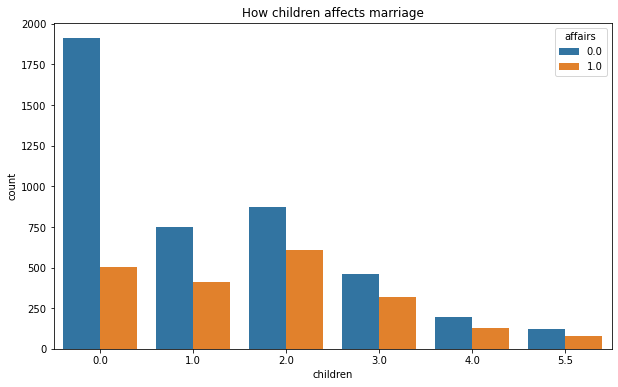

In [27]:

# How children affects the children wife relationship
plt.figure(figsize=(10,6))
sns.countplot(x="children",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()

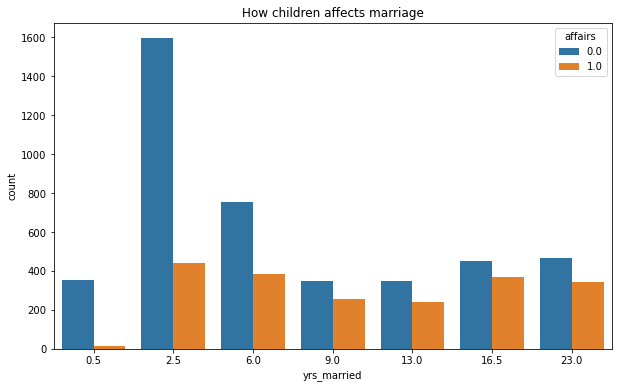

As the married couple spend more and more years together there would be great chance 
that his wife would be in extra marital relation
Best result of trust and negligible extra marital affair seen in newly married couple


In [28]:
# How years of marriage affects extra married life
plt.figure(figsize=(10,6))
sns.countplot(x="yrs_married",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()
print("""As the married couple spend more and more years together there would be great chance 
that his wife would be in extra marital relation
Best result of trust and negligible extra marital affair seen in newly married couple""")

In [29]:
pd.crosstab(df.yrs_married, y.bin_affairs.astype(bool))

bin_affairs,False,True
yrs_married,,
0.5,354,16
2.5,1595,439
6.0,754,387
9.0,348,254
13.0,347,243
16.5,449,369
23.0,466,345


In [30]:
pd.crosstab(df.yrs_married, y.bin_affairs.astype(bool)).div(pd.crosstab(df.yrs_married, y.bin_affairs.astype(bool)).sum(1).astype(float), axis=0)



bin_affairs,False,True
yrs_married,,
0.5,0.956757,0.043243
2.5,0.784169,0.215831
6.0,0.660824,0.339176
9.0,0.578073,0.421927
13.0,0.588136,0.411864
16.5,0.548900,0.451100
23.0,0.574599,0.425401


Text(0, 0.5, 'Percentage')

<Figure size 1440x432 with 0 Axes>

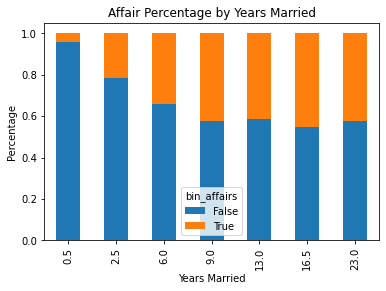

In [31]:
plt.figure(figsize=(20,6))
pd.crosstab(df.yrs_married, y.bin_affairs.astype(bool)).div(pd.crosstab(df.yrs_married, y.bin_affairs.astype(bool)).sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

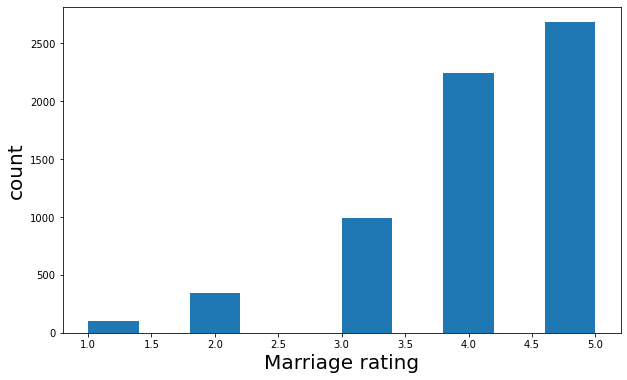

From above figure we can say 
large bunch of women is satisfied with their married life irrespective of their affairs
i.e It doesn;t affect the happiness of the current relationship


In [32]:
# Rating of married life on a scale of 1-5
plt.figure(figsize=(10,6))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()
print("""From above figure we can say 
large bunch of women is satisfied with their married life irrespective of their affairs
i.e It doesn;t affect the happiness of the current relationship""")

In [33]:
# what impact does education makes on married life of the couple
df["educ"].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

In [34]:
df['educ'].unique()

array([17., 14., 16., 12., 20.,  9.])

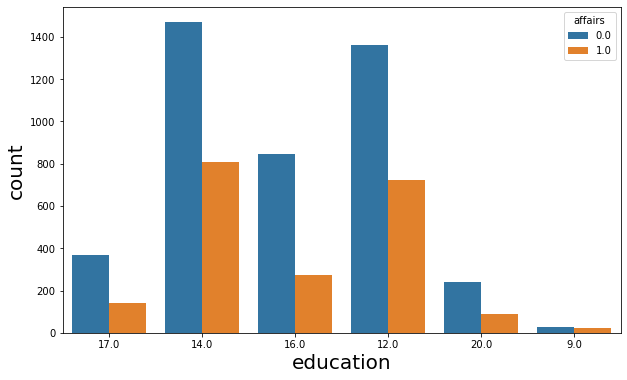

Women who is doing white collar jobs having less chance of affair and women with graduation and higher educational background 
also has less chance of affair but for those women
who is in college and have lower literacy has shown more interest in extra marital affairs.



In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x="educ",hue="affairs",data=df,order=df['educ'].unique())
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()
print("""Women who is doing white collar jobs having less chance of affair and women with graduation and higher educational background 
also has less chance of affair but for those women
who is in college and have lower literacy has shown more interest in extra marital affairs.
""")

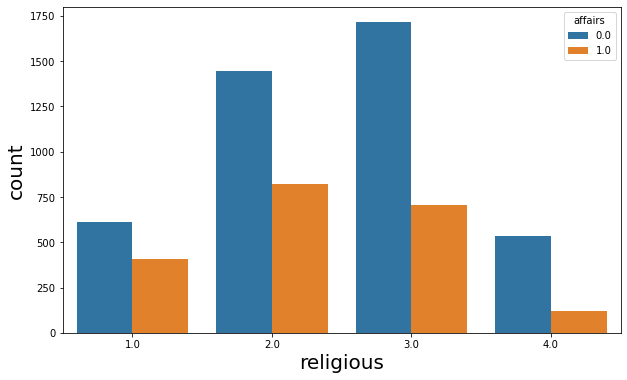


More the women will be religious lesser will be the chance that women will have extra marital affair.



In [36]:
# How the marriage of women affect by religiousness
plt.figure(figsize=(10,6))
sns.countplot(x="religious",hue="affairs",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()
print("""
More the women will be religious lesser will be the chance that women will have extra marital affair.
""")

## Logistic Regression

In [38]:
# instantiate a logistic regression model, and fit with X and y
model1 = LogisticRegression()
model1 = model1.fit(X, y_)

# check the accuracy on the training set
model1.score(X, y_)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7244737668865849

In [39]:
# what percentage had affairs?
y_.mean()

0.3224945020420987

##### Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

In [40]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=0)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)
y_train_predicted=model2.predict(X_train)
print(y_train_predicted)


[1. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [42]:
np.where(predicted[predicted>0])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [43]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.34777692 0.65222308]
 [0.91176741 0.08823259]
 [0.72739284 0.27260716]
 ...
 [0.56250985 0.43749015]
 [0.81090574 0.18909426]
 [0.75019186 0.24980814]]


In [44]:
## Evalutation of the model
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,predicted))

train set accuracy score:  0.7237432675044884
test set accuracy score : 0.7308900523560209


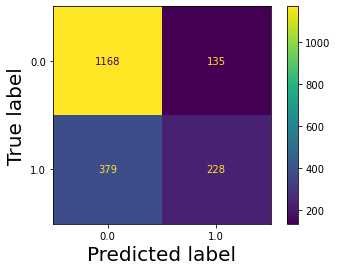

In [45]:
## Confusion Matrix
cm = confusion_matrix(y_test, predicted, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
plt.show()

In [46]:
print("""N==0
P==1
TN, FP .. FN, TP
############################################################################################################
Here we should be careful about FP because our model will predict the women having affair
but in actual she won’t have any affair which may leads to divorce for the mistake she has not done 
so we should show some carefulness about FP value when we are dealing with such sensitive kind of prediction.

""")

N==0
P==1
TN, FP .. FN, TP
############################################################################################################
Here we should be careful about FP because our model will predict the women having affair
but in actual she won’t have any affair which may leads to divorce for the mistake she has not done 
so we should show some carefulness about FP value when we are dealing with such sensitive kind of prediction.




In [47]:
#Finding Precision,Recall F1- Score
model2_report=classification_report(y_test,predicted)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1303
         1.0       0.63      0.38      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.64      1910
weighted avg       0.71      0.73      0.71      1910



##### As we can see the f1 and recall differs a lot from respective Negative(0) as well as Positive(1)


##### Above model is not a good model

roc_auc_score:  0.6360053658962147


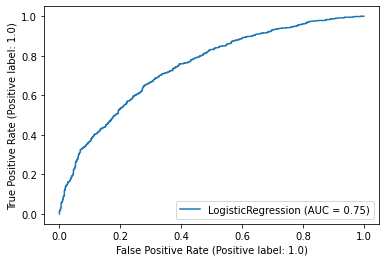

In [48]:
RocCurveDisplay.from_estimator(
    model2, X_test, y_test)


print('roc_auc_score: ', roc_auc_score(y_test,predicted))
plt.show()

In [49]:
pred_probab=model2.predict_proba(X_test)
print("Prediction chance of your model :")
print(model2.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3]]))*100)

Prediction chance of your model :
[[ 0.27032213 99.72967787]]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
print(model2.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3]]))*100)

[[ 0.27032213 99.72967787]]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle 
model_file_name="LR_model.pkl"
pickle.dump(model2,open(model_file_name,'wb'))

In [81]:
pred=model2.predict(X_test)
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [84]:
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [85]:
X_test

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
2764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,9.0,2.0,1.0,14.0
4481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,22.0,2.5,0.0,4.0,16.0
5360,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,6.0,0.0,2.0,17.0
5802,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,42.0,23.0,2.0,3.0,17.0
1220,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,27.0,6.0,1.0,3.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,22.0,2.5,1.0,3.0,12.0
1875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,37.0,16.5,2.0,3.0,14.0
5851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,6.0,0.0,2.0,20.0
4962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,22.0,2.5,0.0,1.0,12.0


In [ ]:
([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3]]))*100)

occ=1
occ_h=

In [87]:
len([0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3])

16

In [89]:
model_load=pickle.load(open("MARITAL_AFFAIR_PREDICTION/LR_model.pkl",'rb'))

In [96]:
model_load.predict_proba([[1,0,0,0,0,1,1,0,0,0,0,5,32,5,2,3]])[0][0]*10000

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


24.74835766475558